# Python Insights - Analisando Dados com Python

### Case - Cancelamento de Clientes

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

Base de dados e arquivos: https://drive.google.com/drive/folders/1uDesZePdkhiraJmiyeZ-w5tfc8XsNYFZ?usp=drive_link

## Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignorar todos os avisos
warnings.filterwarnings("ignore")

## Carregando tabela

In [2]:
tabela = pd.read_csv("cancelamentos_sample.csv")
tabela

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,349936.0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,100634.0,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,301263.0,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,119358.0,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,130955.0,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,195680.0,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,43477.0,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,169273.0,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,310693.0,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


## Tratando os dados

### 1) Identificando e removendo valorez vazios

In [3]:
print(tabela.info())
tabela = tabela.dropna(how='any', axis=0)
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              50000 non-null  float64
 1   idade                   50000 non-null  float64
 2   sexo                    49997 non-null  object 
 3   tempo_como_cliente      49998 non-null  float64
 4   frequencia_uso          50000 non-null  float64
 5   ligacoes_callcenter     50000 non-null  float64
 6   dias_atraso             50000 non-null  float64
 7   assinatura              50000 non-null  object 
 8   duracao_contrato        50000 non-null  object 
 9   total_gasto             50000 non-null  float64
 10  meses_ultima_interacao  50000 non-null  float64
 11  cancelou                50000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 49996 entries, 0 to 49999
Data columns (total 1

## EDA

### 1) Quantas pessoas cancelaram e qual a porcentagem?

In [4]:
print(tabela["cancelou"].value_counts())
print(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

cancelou
1.0    28393
0.0    21603
Name: count, dtype: int64
cancelou
1.0    56.8%
0.0    43.2%
Name: proportion, dtype: object


### 56.8% cancelaram
### 43.2% não cancelaram

### 2) Quantas pessoas pertencem a cada tipo de contrato e a porcentagem?

In [5]:
print(tabela["duracao_contrato"].value_counts())
print(tabela["duracao_contrato"].value_counts(normalize=True))

duracao_contrato
Annual       20156
Quarterly    19956
Monthly       9884
Name: count, dtype: int64
duracao_contrato
Annual       0.403152
Quarterly    0.399152
Monthly      0.197696
Name: proportion, dtype: float64


### Annual       40.31%
### Quarterly    39.91%
### Monthly      19.77%

### 3) Analisando as médias das demais variáveis por duração de contrato

In [6]:
tabela.groupby("duracao_contrato").mean(numeric_only=True)

,CustomerID,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
duracao_contrato,,,,,,,,,
Annual,248594.055418,38.783985,31.416452,15.910449,3.277585,12.533985,650.925840,14.231544,0.464080
Monthly,132400.770437,41.428470,30.677964,15.577600,4.923917,15.078814,547.508921,15.392655,1.000000
Quarterly,249900.662658,38.833935,31.522099,15.842504,3.256113,12.480006,654.102443,14.364602,0.458759


### Taxa de cancelamento para plano mensal é 100%

###  Vamos eliminar o plano mensal do dataset e continuar analisando

In [7]:
tabela = tabela[tabela["duracao_contrato"]!="Monthly"]
print(tabela["cancelou"].value_counts())
print(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

cancelou
0.0    21603
1.0    18509
Name: count, dtype: int64
cancelou
0.0    53.9%
1.0    46.1%
Name: proportion, dtype: object


### A taxa de cancelamentos caiu de 56.8% para 46.1% com a eliminação do plano mensal

### 4) Qual a proporção de pessoas em cada tipo de assinatura?

In [8]:
display(tabela.groupby("assinatura").mean(numeric_only=True))
print(tabela["assinatura"].value_counts(normalize=True))

,CustomerID,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
assinatura,,,,,,,,,
Basic,246144.091386,38.777049,32.266908,15.938459,3.328064,12.538752,648.339261,14.317036,0.476517
Premium,250921.064070,38.885766,31.120813,15.762111,3.238038,12.430697,653.459842,14.306071,0.453947
Standard,250534.448326,38.764035,31.055850,15.929697,3.237345,12.551601,655.504070,14.271479,0.454499


assinatura
Standard    0.343264
Premium     0.333466
Basic       0.323270
Name: proportion, dtype: float64


### Não conseguimos tirar nenhuma conclusão em relação ao tipo de assinatura

### 5) Plotando histogramas para entender melhor os dados em relação aos cancelamentos

Text(0.5, 1.0, 'Taxa de cancelamento por nº de ligações')

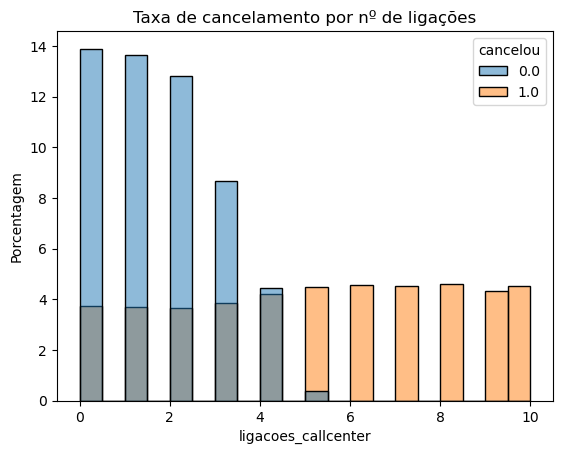

In [9]:
sns.histplot(data=tabela, x ='ligacoes_callcenter', hue='cancelou', bins=20, stat='percent')
plt.ylabel('Porcentagem')
plt.title('Taxa de cancelamento por nº de ligações')

### Vemos que acima de 5 ligações a taxa de cancelamento é de 100 %

Text(0.5, 1.0, 'Taxa de cancelamento por dias de atraso')

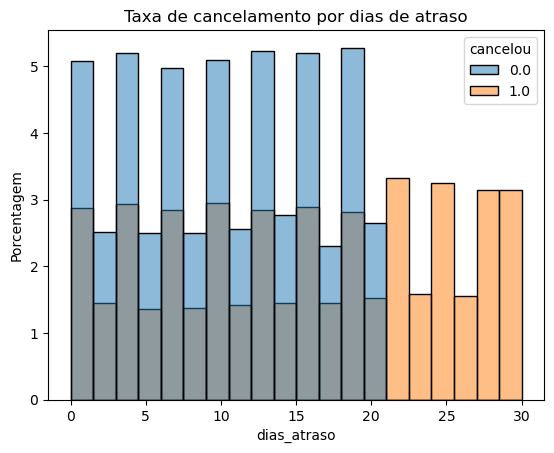

In [10]:
sns.histplot(data=tabela, x ='dias_atraso', hue='cancelou', bins=20, stat='percent')
plt.ylabel('Porcentagem')
plt.title('Taxa de cancelamento por dias de atraso')

### Vemos que acima de 20 dias de atraso a taxa de cancelamento é de 100 %

### Vamos remover agora os casos com ligacoes_callcenter < 5 e dias_atraso < 20

In [11]:
tabela = tabela[(tabela["ligacoes_callcenter"]<5) & (tabela["dias_atraso"]<=20)]
display(tabela)
print(tabela["cancelou"].value_counts())
print(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,349936.0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
2,301263.0,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,119358.0,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
6,345190.0,49.0,Male,6.0,7.0,0.0,0.0,Standard,Annual,751.00,11.0,0.0
7,405747.0,33.0,Male,15.0,18.0,1.0,20.0,Standard,Annual,839.71,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49991,300321.0,24.0,Female,33.0,28.0,1.0,11.0,Premium,Annual,844.05,9.0,0.0
49992,434747.0,37.0,Male,46.0,29.0,2.0,9.0,Standard,Quarterly,517.86,3.0,0.0
49994,190074.0,63.0,Male,16.0,24.0,2.0,18.0,Standard,Quarterly,442.00,26.0,1.0
49995,195680.0,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0


cancelou
0.0    21446
1.0     4821
Name: count, dtype: int64
cancelou
0.0    81.6%
1.0    18.4%
Name: proportion, dtype: object


### Conseguindo reduzir o número de dias de atraso para abaixo de 20 e o número de ligações do call center para abaixo de 5, reduzimos a porcentagem de cancelamentos de 46.1% para 18.4%

### CONCLUSÕES

##### - Forma de contrato mensal deve ser eliminada
##### - Necessidade de ligações no call center deve ficar abaixo de 5
##### - Atraso no pagamento não deve passar 20 dias